In [1]:
import pandas as pd

df = pd.read_csv("./data.csv")
df

,Career Fair Name,Career Fair Session Start Date,Student Attendees Email - Institution,Student Attendees First Name,Student Attendees Last Name,Student Attendee Colleges Name,Student Attendee School Years Name,Student Attendees ID,Student Attendees Gender,Student Attendees Ethnicity,Student Attendee Work Authorizations Name,Student Attendee Majors Name List,Student Attendee Institution Labels Name List
0,Fall 2024 ADMIT UCLA: Graduate & Professional ...,10/24/2024,bruinclaphoney@ucla.edu,SUHEON,PARK,LIFE SCIENCE,Senior,49110668,Man,Foreign,Student (F-1) Visa,Cognitive Science,"event access, bachelor of science"
1,Fall 2024 ADMIT UCLA: Graduate & Professional ...,10/24/2024,kchang809@gmail.com,KRISTY,CHANG,SOCIAL SCIENCE,Senior,31328801,Woman,Asian Or Pacific Islander,U.S. Citizen,Communication,"bachelor of arts, event access"
2,Fall 2024 ADMIT UCLA: Graduate & Professional ...,10/24/2024,sahel2679@g.ucla.edu,SAHEL,HAZEGHSA,LIFE SCIENCE,Alumni,41836983,Woman,White Non Hispanic,U.S. Citizen,Biology,"bachelor of science, event access"
3,Fall 2024 ADMIT UCLA: Graduate & Professional ...,10/24/2024,sofiathanos@ucla.edu,SOFIA,THANOPOULOS,HUMANITIES,Senior,48952450,Woman,White Non Hispanic,U.S. Citizen,Art History,"bachelor of arts, event access"
4,Fall 2024 ADMIT UCLA: Graduate & Professional ...,10/24/2024,harbaksh@ucla.edu,HARBAKSH,KAUR,SOCIAL SCIENCE,Senior,24760227,Woman,Asian Or Pacific Islander,U.S. Citizen,Political Science,"bachelor of arts, event access"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Fall 2024 UBS@UCLA Consulting Night,9/30/2024,aionescu2@ucla.edu,AMELIE,IONESCU,SOCIAL SCIENCE,Senior,31523428,Woman,Unknown,U.S. Citizen,Economics,"event access, bachelor of arts"
4996,Fall 2024 UBS@UCLA Consulting Night,9/30/2024,samueloh@ucla.edu,SAMUEL,OH,PHYSICAL SCIENCE,Sophomore,31522700,Man,Foreign,Student (F-1) Visa,PREAPPLIED MATHEMATICS,"event access, bachelor of science"
4997,Fall 2024 UBS@UCLA Consulting Night,9/30/2024,radhika.m.krsna@gmail.com,RADHIKA,MEHRA,INTERNATIONAL INSTITUTE,Alumni,41276022,Woman,Foreign,Student (F-1) Visa,International Development Studies,"event block, ocr block, in, appointment block,..."
4998,Fall 2024 UBS@UCLA Consulting Night,9/30/2024,nelseq.2021@gmail.com,NELSON,SEQUEIRA,SOCIAL SCIENCE,Junior,58020407,Man,Hispanic,U.S. Citizen,PREECONOMICS,"bachelor of arts, event access"


In [2]:
df["Student Attendee School Years Name"].value_counts()

Senior                  1731
Junior                  1073
Masters                 1044
Sophomore                489
Freshman                 267
Doctorate                231
Alumni                   100
Postdoctoral Studies      25
Name: Student Attendee School Years Name, dtype: int64

In [8]:
df["Career Fair Name"].value_counts()

Fall 2024 UCLA STEM Fair (In-Person) â€“ Formerly known as "E&T Fair"          1963
Fall 2024 HIRE UCLA (In-Person): Job & Internship Fair                         1418
UCLA STEM Grad Student and Postdoc Employer Networking Luncheon - Fall 2024     395
Fall 2024 ADMIT UCLA: Graduate & Professional School Fair                       312
Fall 2024 UBS@UCLA Consulting Night                                             297
Fall 2024 UBS@UCLA  Financial Services Night                                    274
Fall 2024 UCLA Virtual STEM Fair                                                238
UCLA Virtual Public Health Employer Showcase 2024                                81
Fall 2024 UCLA Employer Resume Day - Hybrid/Open Industry Edition                22
Name: Career Fair Name, dtype: int64

Fall 2024 UCLA STEM Fair (In-Person) â€“ Formerly known as "E&T Fair"
Other       1435
Master's     448
Doctoral      73
Postdoc        7
Name: Education_Class, dtype: int64


/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_15471/1835303470.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Education_Level'] = filtered_data['Education_Level'].fillna('Other').astype(str)
/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_15471/1835303470.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Education_Class'] = filtered_data['Education_Level'].apply(classify_education_level)


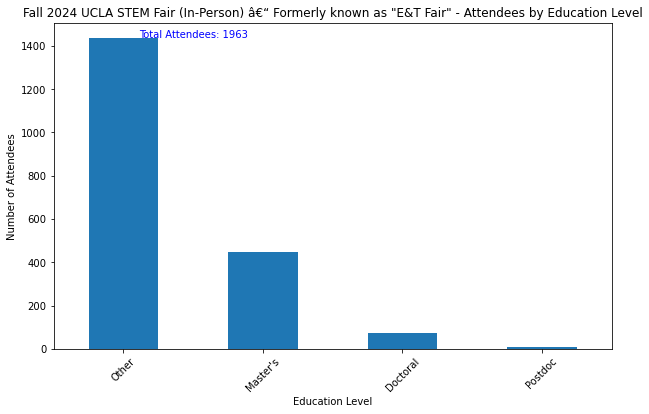

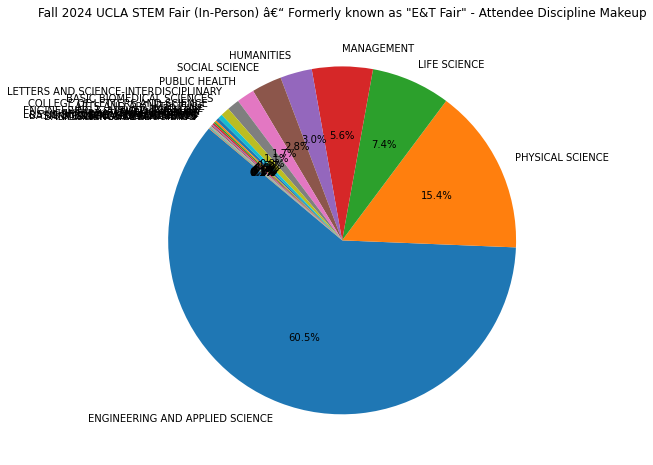

Fall 2024 UCLA Virtual STEM Fair
Other       173
Master's     55
Doctoral     10
Name: Education_Class, dtype: int64


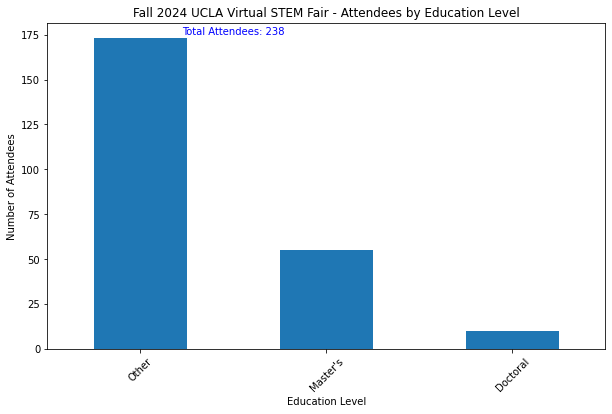

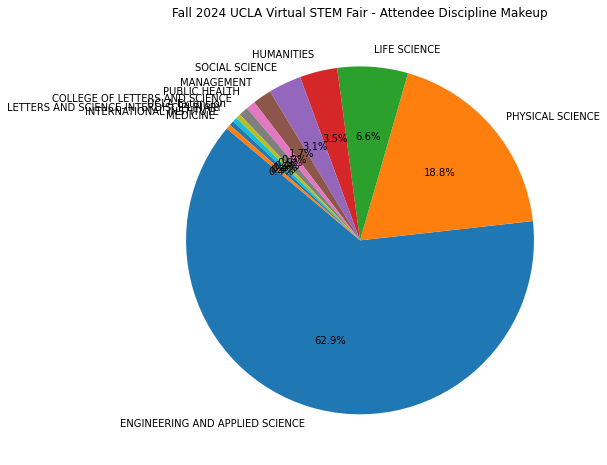

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter and clean relevant columns
# Renaming for simplicity in usage
data = df.rename(columns={
    'Career Fair Name': 'Fair',
    'Student Attendee School Years Name': 'Education_Level',
    'Student Attendee Colleges Name': 'Discipline'
})

# Select the relevant fairs based on the description (STEM Fair, STEM Luncheon, HIRE Fair)
target_fairs = ["STEM Fair", "STEM Grad Student & Postdoc Employer Networking Luncheon", "HIRE Fair"]
filtered_data = data[data['Fair'].str.contains('|'.join(target_fairs), case=False, na=False)]

# Function to classify education levels (Master's, Doctoral, Postdoc, Others)
def classify_education_level(level):
    if "Master" in level:
        return "Master's"
    elif "Doctorate" in level:
        return "Doctoral"
    elif "Postdoc" in level:
        return "Postdoc"
    else:
        return "Other"  # Includes undergraduate, alumni, and others

# Handle missing or non-string values in the 'Education_Level' column
filtered_data['Education_Level'] = filtered_data['Education_Level'].fillna('Other').astype(str)

# Apply the classification function
filtered_data['Education_Class'] = filtered_data['Education_Level'].apply(classify_education_level)

# Aggregating and plotting for each fair
fair_groups = filtered_data.groupby('Fair')

# Generating the required charts for each fair
for fair_name, group in fair_groups:
    print(fair_name)
    # Count of attendees by education level
    edu_counts = group['Education_Class'].value_counts()
    print(edu_counts)
    total_attendees = edu_counts.sum()
    
    # Count of attendees by discipline
    discipline_counts = group['Discipline'].value_counts()
    
    # Plotting the bar chart for education level distribution
    plt.figure(figsize=(10, 6))
    edu_counts.plot(kind='bar')
    plt.title(f'{fair_name} - Attendees by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Number of Attendees')
    plt.xticks(rotation=45)
    plt.text(0.5, max(edu_counts) + 2, f'Total Attendees: {total_attendees}', ha='center', color='blue')
    plt.show()
    
    # Plotting the pie chart for discipline distribution
    plt.figure(figsize=(8, 8))
    discipline_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(f'{fair_name} - Attendee Discipline Makeup')
    plt.ylabel('')
    plt.show()
